In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, GlobalAveragePooling2D, Activation, Reshape, LeakyReLU, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from cluster_data_creation import data_for_cluster, cluster_extract

In [ ]:
feat_num = 21
classes = 3

# load data from df to arrays to train and test

def xls2df(df, N, split=0.8):
    # strings of feature names for reference
    # of 21 features
    feat_num = 21
    classes = 3
    feature_names = np.array([data[i][0] for i in range(1, feat_num+classes)])

    # load all data
    all_data = np.array([[data[i][j] for i in range(1, feat_num+1)]
                                     for j in range(1, N+1)])
    # load all labels
    all_labels = np.array([data[23][i] for i in range(1, N+1)])

    # shuffle indices so that no class gets huddled together
    idxs = [i for i in range(N)]
    np.random.shuffle(idxs)
    all_data = all_data[idxs]
    all_labels = all_labels[idxs]

    # split into 80: 20 for test: train data
    train_num = int(N*split)

    # load train data
    train_data = all_data[:train_num]

    # load train labels
    train_labels = all_labels[:train_num]

    # load test data
    test_data = all_data[train_num:]

    # load test labels
    test_labels = all_labels[train_num:]

    return train_data, train_labels, test_data, test_labels

In [ ]:
# load data
xls = pd.ExcelFile('CTG.xls')
data = pd.read_excel(xls, 'Data')

x_train, y_train, x_test, y_test = xls2df(data, 2126)
y_train = y_train-1
y_test = y_test - 1

# LogisticRegressionTest


## Test on original dataset

In [ ]:
lrmodel = Sequential()

lrmodel.add(Dense(3, activation="softmax"))

In [ ]:
lrmodel.compile(optimizer="adam", loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = lrmodel.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1238 - loss: 112.6417 - val_accuracy: 0.1174 - val_loss: 94.2173
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1468 - loss: 86.4640 - val_accuracy: 0.1174 - val_loss: 70.7173
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1424 - loss: 64.4626 - val_accuracy: 0.1174 - val_loss: 47.1770
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1478 - loss: 40.3609 - val_accuracy: 0.1338 - val_loss: 24.1967
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2193 - loss: 21.0005 - val_accuracy: 0.6432 - val_loss: 14.1792
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6567 - loss: 15.3026 - val_accuracy: 0.7582 - val_loss: 13.3024
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7273 - loss: 13.7096 - val_accuracy: 0.7465 - val_loss: 11.8468
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6843 - loss: 12.6167 - val_acc

In [ ]:
y_pred = lrmodel.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy of Bernoulli NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Bernoulli NB:", f1_score(y_test, y_pred, average='macro'))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy of Bernoulli NB: 0.8145539906103286
F-score of Bernoulli NB: 0.6108205431333781


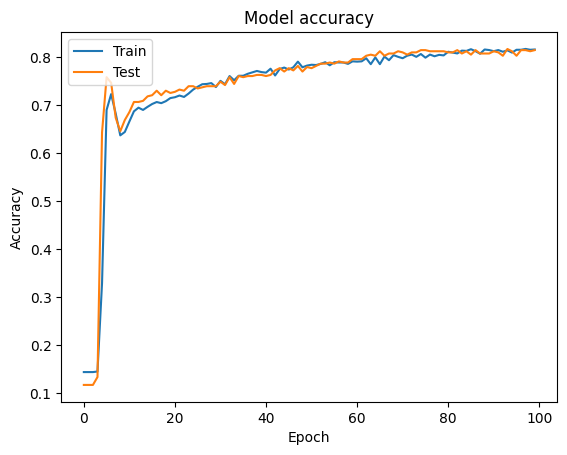

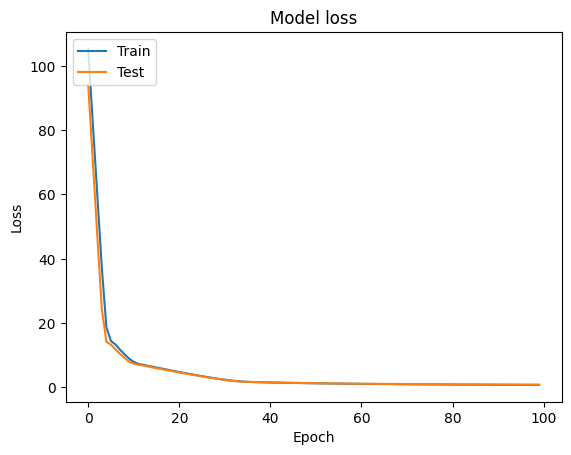

In [ ]:
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure()
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Test on Artificial Data


In [ ]:
# load data
xls = pd.ExcelFile('artificial_FINAL.xlsx')
data = pd.read_excel(xls, 'Sheet1')

x_train, y_train, x_test, y_test = xls2df(data, 5400)
y_train = y_train-1
y_test = y_test - 1

In [ ]:
#Normalize data:

x_train = (x_train - np.min(x_train))/(np.max(x_train) - np.min(x_train))
x_test = (x_test - np.min(x_test))/(np.max(x_test) - np.min(x_test))

In [ ]:
lrmodel1 = Sequential()

lrmodel1.add(Dense(3, activation="softmax"))

In [ ]:
lrmodel1.compile(optimizer="adam", loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist1 = lrmodel1.fit(x_train, y_train, batch_size=16, epochs=120, validation_data=(x_test, y_test))

Epoch 1/120
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4632 - loss: 1.0693 - val_accuracy: 0.5759 - val_loss: 1.0252
Epoch 2/120
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5907 - loss: 1.0170 - val_accuracy: 0.6148 - val_loss: 0.9797
Epoch 3/120
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6329 - loss: 0.9764 - val_accuracy: 0.7157 - val_loss: 0.9404
Epoch 4/120
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7203 - loss: 0.9321 - val_accuracy: 0.7343 - val_loss: 0.9051
Epoch 5/120
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7503 - loss: 0.9031 - val_accuracy: 0.7426 - val_loss: 0.8750
Epoch 6/120
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7378 - loss: 0.8837 - val_accuracy: 0.7528 - val_loss: 0.8478
Epoch 7/120
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7437 - loss: 0.8484 - val_accuracy: 0.7630 - val_loss: 0.8236
Epoch 8/120
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7714 - loss: 0.8224 - val_accu

In [ ]:
y_pred = lrmodel1.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy of Bernoulli NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Bernoulli NB:", f1_score(y_test, y_pred, average='macro'))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy of Bernoulli NB: 0.8416666666666667
F-score of Bernoulli NB: 0.8421797195767291


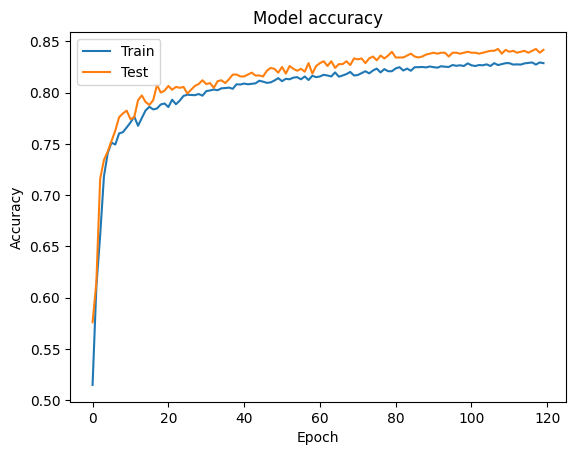

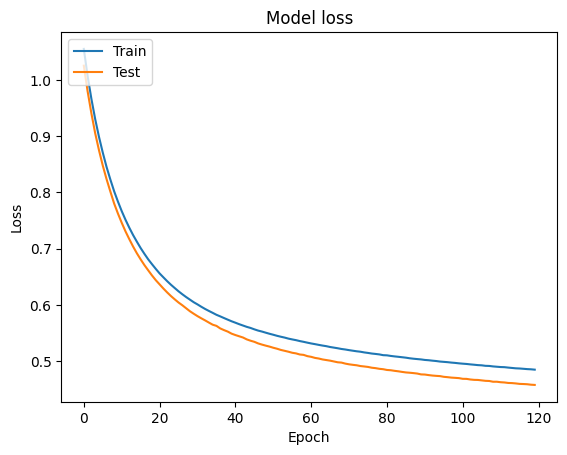

In [ ]:
# Plot training & validation accuracy values
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure()
# Plot training & validation loss values
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# KNN Test


In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
feat_num = 21
classes = 3

# load data from df to arrays to train and test

def xls2df(df, N, split=0.8):
    # strings of feature names for reference
    # of 21 features
    feat_num = 21
    classes = 3
    feature_names = np.array([data[i][0] for i in range(1, feat_num+classes)])

    # load all data
    all_data = np.array([[data[i][j] for i in range(1, feat_num+1)]
                                     for j in range(1, N+1)])
    # load all labels
    all_labels = np.array([data[23][i] for i in range(1, N+1)])

    # shuffle indices so that no class gets huddled together
    idxs = [i for i in range(N)]
    np.random.shuffle(idxs)
    all_data = all_data[idxs]
    all_labels = all_labels[idxs]

    # split into 80: 20 for test: train data
    train_num = int(N*split)

    # load train data
    train_data = all_data[:train_num]

    # load train labels
    train_labels = all_labels[:train_num]

    # load test data
    test_data = all_data[train_num:]

    # load test labels
    test_labels = all_labels[train_num:]

    return train_data, train_labels, test_data, test_labels

In [ ]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data, factor):
    # Set upper and lower limit to 'factor' standard deviation
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * factor

    lower_limit  = data_mean - anomaly_cut_off
    upper_limit = data_mean + anomaly_cut_off
    anomalies = []
    idxs = []
    i = 0
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
            idxs.append(i)
        i += 1
    return anomalies, idxs

## Test on original dataset

In [ ]:
# load data
xls = pd.ExcelFile('CTG.xls')
data = pd.read_excel(xls, 'Data')

x_train, y_train, x_test, y_test = xls2df(data, 2126)

Max accuracy: 0.9131455399061033
Max fscore: 0.8451894847285993
Best no. of neighbors, acc to accuracy: 3
Best no. of neighbors, acc to f-score: 1


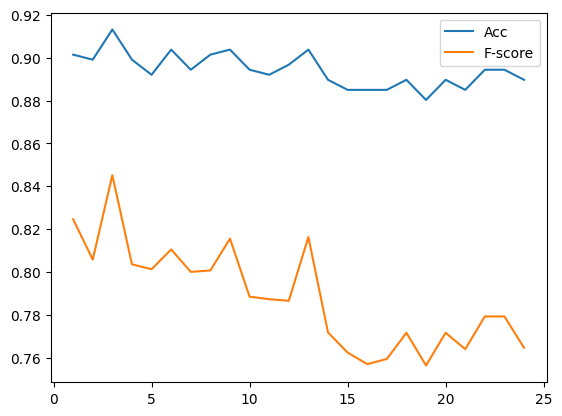

In [ ]:
# check for different values of neighbors
accs = []
fscores = []
x1, x2 = 1, 25
best_acc_n = x1
best_fs_n = x1

for i in range(x1, x2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accs.append(metrics.accuracy_score(y_test, y_pred))
    fscores.append(f1_score(y_test, y_pred, average='macro'))
    if accs[-1] > accs[best_acc_n-x1]:
        best_acc_n = i
    if fscores[-1] > accs[best_fs_n-x1]:
        best_fs_n = i

plt.plot([i for i in range(x1, x2)], accs)
plt.plot([i for i in range(x1, x2)], fscores)
plt.legend(['Acc', 'F-score'])
print("Max accuracy:", max(accs))
print("Max fscore:", max(fscores))
print("Best no. of neighbors, acc to accuracy:", best_acc_n)
print("Best no. of neighbors, acc to f-score:", best_fs_n)

In [ ]:
# get all data for original data where:
N = 2126

data_features = np.array([[data[i][j] for i in range(1, feat_num+1)]
                                 for j in range(1, N+1)])
data_labels = np.array([data[23][i] for i in range(1, N+1)])

clusters = cluster_extract(data_features, data_labels)
normals = clusters.get_cluster_from_data(1)
suspects = clusters.get_cluster_from_data(2)
patho = clusters.get_cluster_from_data(3)

idxs = []

for i in range(21):
    idx = find_anomalies(normals[:,i], 3)[1]
    for i in idx:
        idxs.append(i)

for i in range(21):
    idx = find_anomalies(suspects[:,i], 3)[1]
    for i in idx:
        idxs.append(i)

for i in range(21):
    idx = find_anomalies(patho[:,i], 3)[1]
    for i in idx:
        idxs.append(i)

idxs = np.array(idxs)
idxs = np.unique(idxs)

new_data = np.delete(data_features, idxs, axis=0)
new_labels = np.delete(data_labels, idxs, axis=0)
new_labels = new_labels - 1
new_N = new_data.shape[0]
new_train = int(new_N*0.8)
new_xtrain = new_data[:new_train]/np.max(new_data[:new_train])
new_ytrain = new_labels[:new_train]
new_xtest = new_data[new_train:]/np.max(new_data[new_train:])
new_ytest = new_labels[new_train:]
print(new_xtrain.shape, new_xtest.shape, new_ytrain.shape, new_ytest.shape)

(1457, 21) (365, 21) (1457,) (365,)


## Test on Artificial Data

In [ ]:
# load data
xls = pd.ExcelFile('artificial_FINAL.xlsx')
data = pd.read_excel(xls, 'Sheet1')

x_train, y_train, x_test, y_test = xls2df(data, 5400)

Max accuracy: 0.8833333333333333
Max fscore: 0.8838923875239323
Best no. of neighbors, acc to accuracy: 3
Best no. of neighbors, acc to f-score: 3


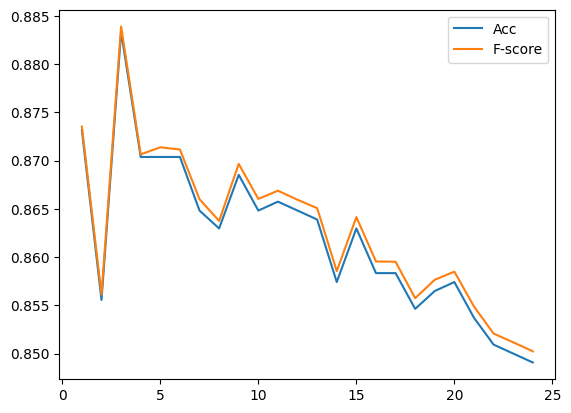

In [ ]:
# check for different values of neighbors
accs = []
fscores = []
x1, x2 = 1, 25
best_acc_n = x1
best_fs_n = x1

for i in range(x1, x2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accs.append(metrics.accuracy_score(y_test, y_pred))
    fscores.append(f1_score(y_test, y_pred, average='macro'))
    if accs[-1] > accs[best_acc_n-x1]:
        best_acc_n = i
    if fscores[-1] > fscores[best_fs_n-x1]:
        best_fs_n = i

plt.plot([i for i in range(x1, x2)], accs)
plt.plot([i for i in range(x1, x2)], fscores)
plt.legend(['Acc', 'F-score'])
print("Max accuracy:", max(accs))
print("Max fscore:", max(fscores))
print("Best no. of neighbors, acc to accuracy:", best_acc_n)
print("Best no. of neighbors, acc to f-score:", best_fs_n)

## Test on Artificial cleaned Data

In [ ]:
# get all data for original data where:
N = 4055

data_features = np.array([[data[i][j] for i in range(1, feat_num+1)]
                                 for j in range(1, N+1)])
data_labels = np.array([data[23][i] for i in range(1, N+1)])

clusters = cluster_extract(data_features, data_labels)
normals = clusters.get_cluster_from_data(1)
suspects = clusters.get_cluster_from_data(2)
patho = clusters.get_cluster_from_data(3)

idxs = []

for i in range(21):
    idx = find_anomalies(normals[:,i], 3)[1]
    for i in idx:
        idxs.append(i)

for i in range(21):
    idx = find_anomalies(suspects[:,i], 3)[1]
    for i in idx:
        idxs.append(i)

for i in range(21):
    idx = find_anomalies(patho[:,i], 3)[1]
    for i in idx:
        idxs.append(i)

idxs = np.array(idxs)
idxs = np.unique(idxs)

new_data = np.delete(data_features, idxs, axis=0)
new_labels = np.delete(data_labels, idxs, axis=0)
new_labels = new_labels - 1
new_N = new_data.shape[0]
new_train = int(new_N*0.8)
new_xtrain = new_data[:new_train]/np.max(new_data[:new_train])
new_ytrain = new_labels[:new_train]
new_xtest = new_data[new_train:]/np.max(new_data[new_train:])
new_ytest = new_labels[new_train:]
print(new_xtrain.shape, new_xtest.shape, new_ytrain.shape, new_ytest.shape)

(3044, 21) (762, 21) (3044,) (762,)


Max accuracy: 0.6430446194225722
Max fscore: 0.35311921977467625
Best no. of neighbors, acc to accuracy: 5
Best no. of neighbors, acc to f-score: 5


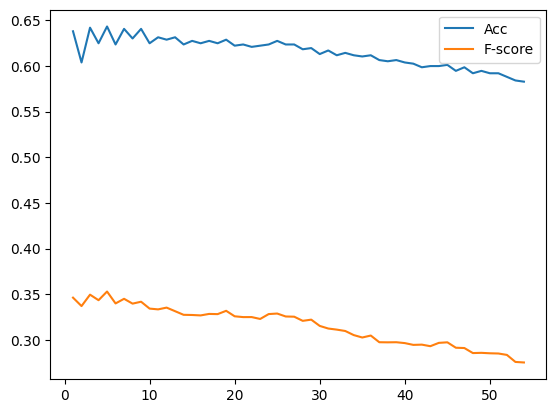

In [ ]:
# check for different values of neighbors
accs = []
fscores = []
x1, x2 = 1, 55
best_acc_n = x1
best_fs_n = x1

for i in range(x1, x2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(new_xtrain,new_ytrain)
    y_pred = model.predict(new_xtest)
    accs.append(metrics.accuracy_score(new_ytest, y_pred))
    fscores.append(f1_score(new_ytest, y_pred, average='macro'))
    if accs[-1] > accs[best_acc_n-x1]:
        best_acc_n = i
    if fscores[-1] > fscores[best_fs_n-x1]:
        best_fs_n = i

plt.plot([i for i in range(x1, x2)], accs)
plt.plot([i for i in range(x1, x2)], fscores)
plt.legend(['Acc', 'F-score'])
print("Max accuracy:", max(accs))
print("Max fscore:", max(fscores))
print("Best no. of neighbors, acc to accuracy:", best_acc_n)
print("Best no. of neighbors, acc to f-score:", best_fs_n)

# Naive Bayes Test

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from cluster_data_creation import data_for_cluster, cluster_extract

In [ ]:
eat_num = 21
classes = 3

# load data from df to arrays to train and test

def xls2df(df, N, split=0.8):
    # strings of feature names for reference
    # of 21 features
    feat_num = 21
    classes = 3
    feature_names = np.array([data[i][0] for i in range(1, feat_num+classes)])

    # load all data
    all_data = np.array([[data[i][j] for i in range(1, feat_num+1)]
                                     for j in range(1, N+1)])
    # load all labels
    all_labels = np.array([data[23][i] for i in range(1, N+1)])

    # shuffle indices so that no class gets huddled together
    idxs = [i for i in range(N)]
    np.random.shuffle(idxs)
    all_data = all_data[idxs]
    all_labels = all_labels[idxs]

    # split into 80: 20 for test: train data
    train_num = int(N*split)

    # load train data
    train_data = all_data[:train_num]

    # load train labels
    train_labels = all_labels[:train_num]

    # load test data
    test_data = all_data[train_num:]

    # load test labels
    test_labels = all_labels[train_num:]

    return train_data, train_labels, test_data, test_labels

## Test on Original Dataset

In [ ]:
# load data
xls = pd.ExcelFile('CTG.xls')
data = pd.read_excel(xls, 'Data')

x_train, y_train, x_test, y_test = xls2df(data, 2126)

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy of Guassian NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Guassian NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Guassian NB: 0.8403755868544601
F-score of Guassian NB: 0.721677971332246


In [ ]:
model = BernoulliNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy of Bernoulli NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Bernoulli NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Bernoulli NB: 0.8779342723004695
F-score of Bernoulli NB: 0.7299348150345703


## Test on Artificial Dataset

In [ ]:
# load data
xls = pd.ExcelFile('artificial_FINAL.xlsx')
data = pd.read_excel(xls, 'Sheet1')

x_train, y_train, x_test, y_test = xls2df(data, 5400)
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy of Guassian NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Guassian NB:", f1_score(y_test, y_pred, average='macro'))

model = BernoulliNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy of Bernoulli NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Bernoulli NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Guassian NB: 0.8851851851851852
F-score of Guassian NB: 0.8857145346507048
Accuracy of Bernoulli NB: 0.9
F-score of Bernoulli NB: 0.9003682937434135


# SVM Test

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
feat_num = 21
classes = 3

# load data from df to arrays to train and test

def xls2df(df, N, split=0.8):
    # strings of feature names for reference
    # of 21 features
    feat_num = 21
    classes = 3
    feature_names = np.array([data[i][0] for i in range(1, feat_num+classes)])

    # load all data
    all_data = np.array([[data[i][j] for i in range(1, feat_num+1)]
                                     for j in range(1, N+1)])
    # load all labels
    all_labels = np.array([data[23][i] for i in range(1, N+1)])

    # shuffle indices so that no class gets huddled together
    idxs = [i for i in range(N)]
    np.random.shuffle(idxs)
    all_data = all_data[idxs]
    all_labels = all_labels[idxs]

    # split into 80: 20 for test: train data
    train_num = int(N*split)

    # load train data
    train_data = all_data[:train_num]

    # load train labels
    train_labels = all_labels[:train_num]

    # load test data
    test_data = all_data[train_num:]

    # load test labels
    test_labels = all_labels[train_num:]

    return train_data, train_labels, test_data, test_labels

## Test on original dataset

### Linear SVM

In [ ]:
# load data
xls = pd.ExcelFile('CTG.xls')
data = pd.read_excel(xls, 'Data')

x_train, y_train, x_test, y_test = xls2df(data, 2126)

Max accuracy: 0.8779342723004695
Max fscore: 0.7551000661512791
Best C, acc to accuracy: 53
Best C, acc to f-score: 53


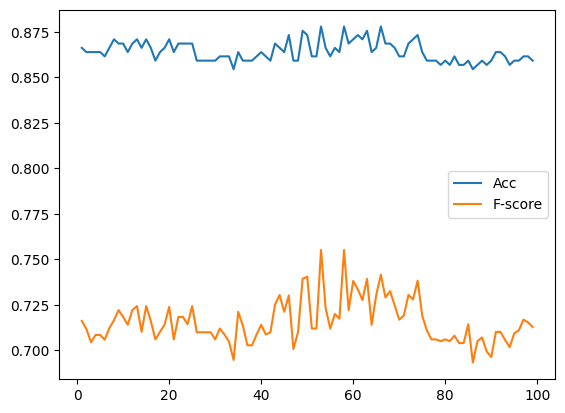

In [ ]:
# check for different values of C
accs = []
fscores = []
x1, x2 = 1, 100
best_acc_n = x1
best_fs_n = x1

for i in range(x1, x2):
    model = SVC(kernel='linear', C = i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accs.append(metrics.accuracy_score(y_test, y_pred))
    fscores.append(f1_score(y_test, y_pred, average='macro'))
    if accs[-1] > accs[best_acc_n-x1]:
        best_acc_n = i
    if fscores[-1] > fscores[best_fs_n-x1]:
        best_fs_n = i

plt.plot([i for i in range(x1, x2)], accs)
plt.plot([i for i in range(x1, x2)], fscores)
plt.legend(['Acc', 'F-score'])
print("Max accuracy:", max(accs))
print("Max fscore:", max(fscores))
print("Best C, acc to accuracy:", best_acc_n)
print("Best C, acc to f-score:", best_fs_n)
#print("Accuracy and fscore remained the same from C=1 to 1100")

Max accuracy: 0.8661971830985915
Max fscore: 0.7201441390050233
Best C, acc to accuracy: 101
Best C, acc to f-score: 103


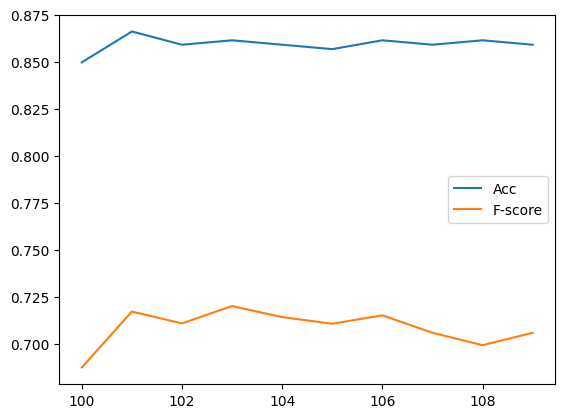

In [ ]:
## try again for a larger interval
# check for different values of C
accs = []
fscores = []
x1, x2 = 100, 110
best_acc_n = x1
best_fs_n = x1

for i in range(x1, x2):
    model = SVC(kernel='linear', C = i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accs.append(metrics.accuracy_score(y_test, y_pred))
    fscores.append(f1_score(y_test, y_pred, average='macro'))
    if accs[-1] > accs[best_acc_n-x1]:
        best_acc_n = i
    if fscores[-1] > fscores[best_fs_n-x1]:
        best_fs_n = i

plt.plot([i for i in range(x1, x2)], accs)
plt.plot([i for i in range(x1, x2)], fscores)
plt.legend(['Acc', 'F-score'])
print("Max accuracy:", max(accs))
print("Max fscore:", max(fscores))
print("Best C, acc to accuracy:", best_acc_n)
print("Best C, acc to f-score:", best_fs_n)
#print("Accuracy and fscore remained the same from C=1 to 1100")

Max accuracy: 0.8896713615023474
Max fscore: 0.795449520514977
Best degree, acc to accuracy: 24
Best degree, acc to f-score: 24


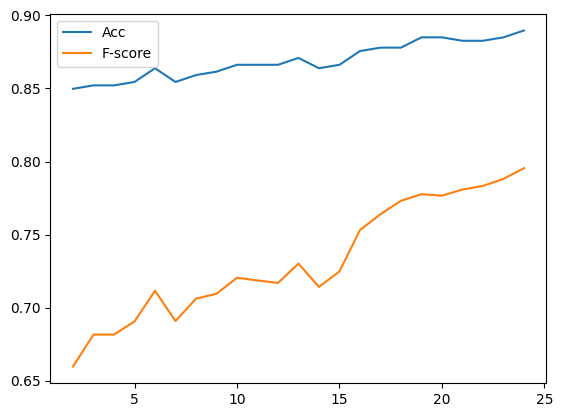

In [ ]:
# check for different degreea of polynomials
accs = []
fscores = []
x1, x2 = 2, 25
best_acc_n = x1
best_fs_n = x1

for i in range(x1, x2):
    model = SVC(kernel='poly', degree=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accs.append(metrics.accuracy_score(y_test, y_pred))
    fscores.append(f1_score(y_test, y_pred, average='macro'))
    if accs[-1] > accs[best_acc_n-x1]:
        best_acc_n = i
    if fscores[-1] > fscores[best_fs_n-x1]:
        best_fs_n = i

plt.plot([i for i in range(x1, x2)], accs)
plt.plot([i for i in range(x1, x2)], fscores)
plt.legend(['Acc', 'F-score'])
print("Max accuracy:", max(accs))
print("Max fscore:", max(fscores))
print("Best degree, acc to accuracy:", best_acc_n)
print("Best degree, acc to f-score:", best_fs_n)

Max accuracy: 0.8896713615023474
Max fscore: 0.7919708135189052
Best degree, acc to accuracy: 25
Best degree, acc to f-score: 25


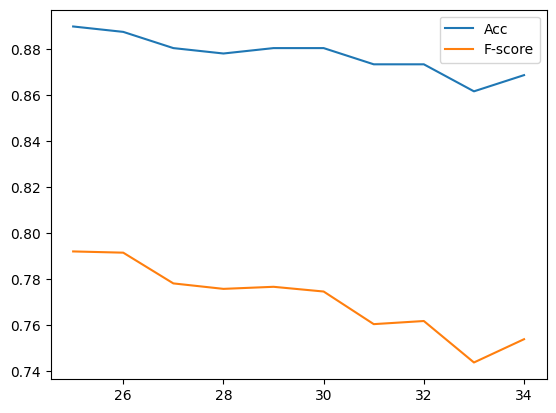

In [ ]:
# try again for a larger interval
# check for different degreea of polynomials
accs = []
fscores = []
x1, x2 = 25, 35
best_acc_n = x1
best_fs_n = x1

for i in range(x1, x2):
    model = SVC(kernel='poly', degree=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accs.append(metrics.accuracy_score(y_test, y_pred))
    fscores.append(f1_score(y_test, y_pred, average='macro'))
    if accs[-1] > accs[best_acc_n-x1]:
        best_acc_n = i
    if fscores[-1] > fscores[best_fs_n-x1]:
        best_fs_n = i

plt.plot([i for i in range(x1, x2)], accs)
plt.plot([i for i in range(x1, x2)], fscores)
plt.legend(['Acc', 'F-score'])
print("Max accuracy:", max(accs))
print("Max fscore:", max(fscores))
print("Best degree, acc to accuracy:", best_acc_n)
print("Best degree, acc to f-score:", best_fs_n)

### RBF Kernel

In [ ]:
model = SVC(kernel='rbf', C=20, gamma=.09)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy of Guassian NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Guassian NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Guassian NB: 0.812206572769953
F-score of Guassian NB: 0.44127550009902955


## Test on artificial data set with best parameters found above

In [ ]:
# load data
xls = pd.ExcelFile('artificial_FINAL.xlsx')
data = pd.read_excel(xls, 'Sheet1')

x_train, y_train, x_test, y_test = xls2df(data, 5400)

### Linear SVM

In [ ]:
model = SVC(kernel='linear', C = 91)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy of Guassian NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Guassian NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Guassian NB: 0.8527777777777777
F-score of Guassian NB: 0.8532587668390138


### Polynomial SVM

In [ ]:
model = SVC(kernel='poly', degree=28)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy of Guassian NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Guassian NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Guassian NB: 0.8703703703703703
F-score of Guassian NB: 0.8702213602338911


### RBF Kernel

In [ ]:
model = SVC(kernel='rbf', C=20, gamma=.09)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy of Guassian NB:", metrics.accuracy_score(y_test, y_pred))
print("F-score of Guassian NB:", f1_score(y_test, y_pred, average='macro'))

Accuracy of Guassian NB: 0.44166666666666665
F-score of Guassian NB: 0.36324022564209213
